In [1]:
!rm -rf Picklsz/ sample_data/ picklz.zip

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from collections import deque
from sklearn import preprocessing
import random
import requests
import os
def notify(text='Task Finished'):

  token = '745063631:AAFSe-GfO013O7CKgSKp3cyRs7qdSXOwy3A'
  data = {'chat_id': '80741935', 'text': text}
  url = f'https://api.telegram.org/bot{token}/sendMessage'
  response = requests.get(url, params=data)
  print(response.json())

def send_document(doc, chat_id='80741935'):
    files = {'document': open(doc, 'rb')}
    token = '745063631:AAFSe-GfO013O7CKgSKp3cyRs7qdSXOwy3A'
    URL = "https://api.telegram.org/bot{}/".format(token)
    requests.post(URL + "sendDocument?chat_id={}".format(chat_id), files=files)
def send_photo(doc, chat_id='80741935'):
    files = {'photo': open(doc, 'rb')}
    token = '745063631:AAFSe-GfO013O7CKgSKp3cyRs7qdSXOwy3A'
    URL = "https://api.telegram.org/bot{}/".format(token)
    requests.post(URL + "sendPhoto?chat_id={}".format(chat_id), files=files)

In [3]:
#Getting the csv file name dirty way!
table_list=[]
new_table_list=[]
for filename in os.listdir("/content/"):
    if filename.endswith('.csv'):
        table_list.append(pd.read_csv(filename,sep="|"))
        new_table_list.append(filename[:-4])

file_name=new_table_list[0]

In [ ]:
!pip install keras-tuner --upgrade

In [5]:
data = pd.read_csv(f'/content/{file_name}.csv',parse_dates=True)
data=data.rename({'<OPEN>':'OPEN','<CLOSE>':'CLOSE','<FIRST>': 'FIRST', '<HIGH>': 'HIGH','<LOW>':'LOW','<VALUE>':'VALUE','<VOL>':'VOLUME','<OPENINT>':'OPENINT','<LAST>':'LAST','<DTYYYYMMDD>':'Date'}, axis=1)  # new method
data.drop(['<PER>','<TICKER>','VALUE','OPENINT','LAST'],axis=1,inplace=True)#These Columns are either redundent or Duplicates ex. CLOSE==LAST
#data['Date']=pd.to_datetime(data['Date'])
data.head()

,Date,FIRST,HIGH,LOW,CLOSE,VOLUME,OPEN
0,20211214,42680.0,44890.0,42680.0,44475.0,297283,44677.0
1,20211213,44821.0,45190.0,43601.0,44677.0,560411,45559.0
2,20211212,45306.0,45850.0,44831.0,45559.0,249282,45813.0
3,20211211,45610.0,46000.0,45610.0,45813.0,415561,45806.0
4,20211208,46190.0,46440.0,45580.0,45806.0,216766,45761.0


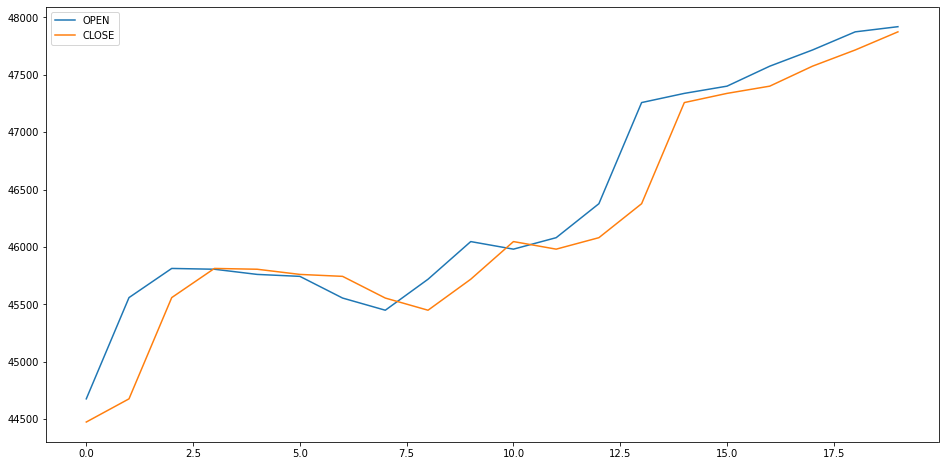

In [6]:
data[['OPEN','CLOSE']][0:20].plot.line(figsize=(16,8))

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1998 non-null   int64  
 1   FIRST   1998 non-null   float64
 2   HIGH    1998 non-null   float64
 3   LOW     1998 non-null   float64
 4   CLOSE   1998 non-null   float64
 5   VOLUME  1998 non-null   int64  
 6   OPEN    1998 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 109.4 KB


In [8]:
data.isnull().sum()

Date      0
FIRST     0
HIGH      0
LOW       0
CLOSE     0
VOLUME    0
OPEN      0
dtype: int64

In [9]:
data['FC']=(data['CLOSE']-data['OPEN'])/data['OPEN']
data['FH'] = (data['HIGH']-data['OPEN'])/data['OPEN']
data['FL']=(data['OPEN']-data['LOW'])/data['OPEN']

In [10]:
data.head(3)

,Date,FIRST,HIGH,LOW,CLOSE,VOLUME,OPEN,FC,FH,FL
0,20211214,42680.0,44890.0,42680.0,44475.0,297283,44677.0,-0.004521,0.004768,0.044699
1,20211213,44821.0,45190.0,43601.0,44677.0,560411,45559.0,-0.019360,-0.008099,0.042977
2,20211212,45306.0,45850.0,44831.0,45559.0,249282,45813.0,-0.005544,0.000808,0.021435


In [11]:
data =data[['FC','FH', 'FL',"CLOSE"]]

In [12]:
data = data.iloc[len(data)-1000:len(data),:]
data

,FC,FH,FL,CLOSE
998,-0.005237,-0.000238,0.011426,4179.0
999,-0.001901,0.007365,0.018294,4201.0
1000,-0.006374,0.003305,0.010859,4209.0
1001,-0.007032,0.005391,0.014534,4236.0
1002,0.009465,0.028869,0.003786,4266.0
...,...,...,...,...
1993,0.049969,0.049969,-0.049969,10149.0
1994,0.049967,0.049967,-0.049967,9666.0
1995,0.049954,0.049954,-0.049954,9206.0
1996,0.049934,0.049934,-0.049934,8768.0


In [13]:
# data = data.iloc[len(data)-1000:len(data),:]

In [14]:
data.fillna(method='ffill', inplace=True)

In [15]:
data.isnull().sum()

FC       0
FH       0
FL       0
CLOSE    0
dtype: int64

In [16]:
data['target']=data['CLOSE'].shift(-1)
price = data[['target']]

In [17]:
data

,FC,FH,FL,CLOSE,target
998,-0.005237,-0.000238,0.011426,4179.0,4201.0
999,-0.001901,0.007365,0.018294,4201.0,4209.0
1000,-0.006374,0.003305,0.010859,4209.0,4236.0
1001,-0.007032,0.005391,0.014534,4236.0,4266.0
1002,0.009465,0.028869,0.003786,4266.0,4226.0
...,...,...,...,...,...
1993,0.049969,0.049969,-0.049969,10149.0,9666.0
1994,0.049967,0.049967,-0.049967,9666.0,9206.0
1995,0.049954,0.049954,-0.049954,9206.0,8768.0
1996,0.049934,0.049934,-0.049934,8768.0,8351.0


In [18]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

norm_data = min_max_scaler.fit_transform(price.values)
norm_data

array([[0.00000000e+00],
       [5.19682993e-04],
       [2.27361310e-03],
       [4.22242432e-03],
       [1.62400935e-03],
       [2.79329609e-03],
       [6.17123555e-03],
       [7.73028453e-03],
       [8.57476939e-03],
       [9.28933351e-03],
       [7.66532415e-03],
       [7.60036378e-03],
       [1.15629466e-02],
       [8.96453164e-03],
       [1.01987787e-02],
       [1.29271145e-02],
       [1.27322333e-02],
       [1.44212031e-02],
       [1.00688580e-02],
       [8.44484864e-03],
       [9.80901650e-03],
       [1.73444199e-02],
       [1.72144992e-02],
       [1.52656879e-02],
       [7.14564116e-03],
       [3.37923866e-01],
       [3.30648305e-01],
       [3.27465246e-01],
       [3.30258542e-01],
       [3.30908146e-01],
       [3.23437703e-01],
       [3.17981032e-01],
       [3.17721190e-01],
       [3.17461349e-01],
       [3.15057815e-01],
       [3.08042094e-01],
       [3.04339353e-01],
       [3.08561777e-01],
       [3.02260621e-01],
       [3.05898402e-01],


In [19]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

In [20]:
past_history = 3
future_target = 0

TRAIN_SPLIT = int(len(norm_data) * 0.8)


x_train, y_train = univariate_data(norm_data,
                                   0,
                                   TRAIN_SPLIT,
                                   past_history,
                                   future_target)

x_test, y_test = univariate_data(norm_data,
                                 TRAIN_SPLIT,
                                 None,
                                 past_history,
                                 future_target)

In [ ]:
from keras.models import Sequential
from kerastuner.tuners import RandomSearch , BayesianOptimization
from kerastuner.engine.hyperparameters import HyperParameters
from keras.layers import Dense, LSTM, LeakyReLU, Dropout
from tensorflow.keras.utils import plot_model
from keras.callbacks import EarlyStopping
import time
from tensorflow.keras.optimizers import Adam


Root="/content/Picklsz"

LOG_DIR=f"{Root}/__{file_name}__{int(time.time())}"

#learning_rate = 0.0001



def build_model(hp):
  model = Sequential()
  model.add(LSTM(units = hp.Int("Input_units", min_value=32, max_value=128, step=32), activation=hp.Choice('actTivation FUnc', ['tanh', 'sigmoid'])))
  if hp.Boolean("dropout"):
    model.add(Dropout(rate=hp.Float("DropOut_ratio",min_value=0.1,max_value=0.5,step=0.1)))
  model.add(Dense(units = 1))
  model.compile(loss='mse', optimizer=Adam(hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")),metrics=['mse'])
  return model

tuner=RandomSearch(
    build_model,
    objective="loss",
    max_trials=20,
    executions_per_trial=1,
    directory=LOG_DIR
)

batch_size = 5
num_epochs = 100

tuner.search(
    x_train,
    y_train,
    validation_split=0.1,
    batch_size=batch_size,
    epochs=num_epochs,
   
)

#


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  



Search: Running Trial #1

Hyperparameter    |Value             |Best Value So Far 
Input_units       |128               |?                 
actTivation FUnc  |tanh              |?                 
dropout           |True              |?                 
lr                |0.0015399         |?                 

Epoch 1/100
144/144 [==============================] - 4s 9ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 2/100
144/144 [==============================] - 1s 6ms/step - loss: 9.3168e-04 - mse: 9.3168e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 3/100
144/144 [==============================] - 1s 6ms/step - loss: 9.9933e-04 - mse: 9.9933e-04 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 4/100
144/144 [==============================] - 1s 6ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 5/100
144/144 [==============================] - 1s 6ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 

In [ ]:
#Saving the optimized Model
import pickle
tuner_path=f"{Root}/tuner_{file_name}_{int(time.time())}.pkl"
with open(tuner_path,"wb") as f:
  pickle.dump(tuner, f)
print(tuner.get_best_hyperparameters()[0].values)
print("\n"*3,"=======================================")
print(tuner.results_summary())




In [ ]:
model=tuner.get_best_models()[0]

In [ ]:
import seaborn as sns
import  matplotlib.pyplot as plt
original = pd.DataFrame(min_max_scaler.inverse_transform(y_test))
predictions = pd.DataFrame(min_max_scaler.inverse_transform(model.predict(x_test)))

figname=f"{Root}/File.png"
fig,ax=plt.subplots(figsize=(16,9))
ax = sns.lineplot(x=predictions.index, y=predictions[0], label="Prediction", color='tomato')
ax = sns.lineplot(x=original.index, y=original[0], label="Test Data", color='royalblue')
ax.set_title(f'{file_name} price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)
plt.savefig(figname)

In [ ]:
model.save(f'{Root}')

In [ ]:
import subprocess

bashCommand = f"zip -r picklz.zip {Root}"
process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
output, error = process.communicate()

In [ ]:
send_photo(figname)
notify(f"{file_name} ==> Result + Files :")
send_document("picklz.zip")
send_document(tuner_path)